### Define Column vectors for dummy train set


In [9]:
import numpy as np

random_seed = 0
np.random.seed(random_seed)

m = 100
X = 2 * np.random.rand(m, 1) # Column Vector
y = 4+ 3 * X + np.random.rand(m, 1)  # Column Vector

# 4.1 Linear Regression


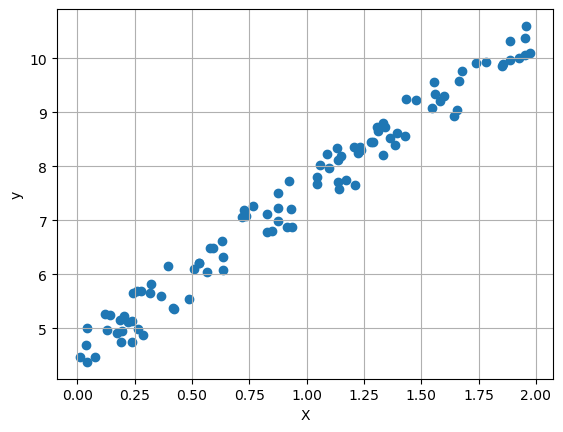

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

Intercept: [4.55808002] 
 Coefficient: [[2.96827553]]


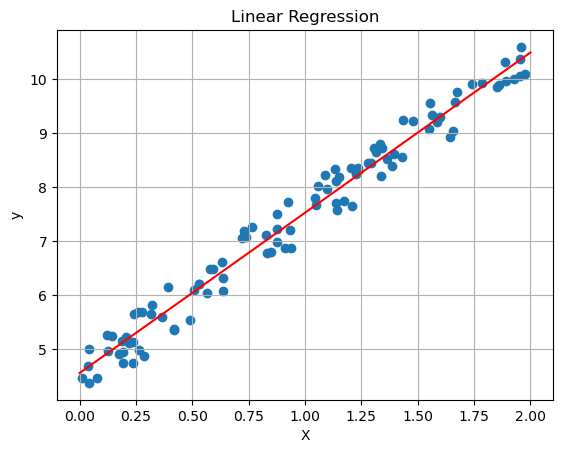

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f"Intercept: {lin_reg.intercept_} \n Coefficient: {lin_reg.coef_}")
X_new = [[0], [2]]
y_pred = lin_reg.predict(X_new)

plt.scatter(X,y)
plt.plot(X_new,y_pred, "r-", label = "Prediction")
plt.title('Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()


# 4.2 Gradient Descent

- Optimization algorithm to find the best solution
- Goal is to minimize the loss function
- It's ideal to find the optimal parameters with GD if the loss function is a convex function
- Feature scaling is required for the proper GD
- Parameters
  - learning rate(step size)
- Using all data in the train set is called **epoch**


### 4.2.1 Batch Gradient Descent

- Use all train set for every step
- Computationally expensive


### 4.2.2 Stochastic Gradient Descent

- Choose one sample at random and perform GD


### 4.2.3 Mini-batch Gradient Descent

- Using small sample called "mini-batch" from the train set and perform GD


# 4.3 Polonmial Regression


# 4.4 Learning Curve

- Analyze training, validation, test loss to check under/over Fitting
- **learning_curve** method gradually train the model and compute train and valid errors


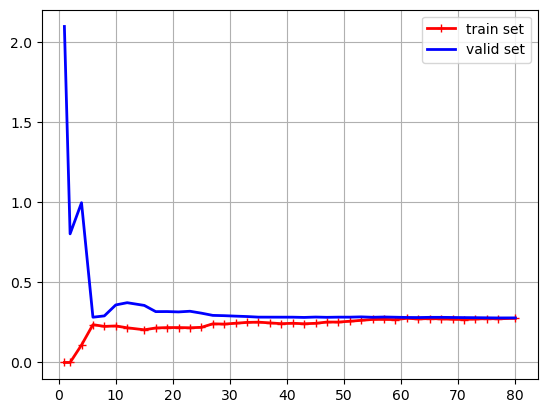

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), 
                                                         X, y,
                                                         train_sizes= np.linspace(0.01, 1.0, 40),
                                                         cv = 5,
                                                         scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = 'train set')
plt.plot(train_sizes, valid_errors, "b-", linewidth = 2, label = 'valid set')
plt.title("Example of good fit of lin-reg with linear data")
plt.grid()
plt.legend()
plt.show()

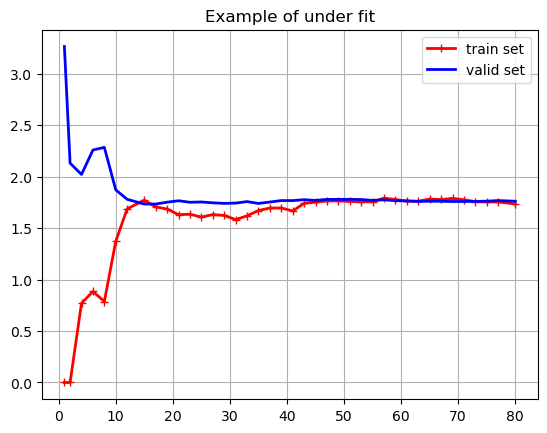

In [ ]:

X  = 6 * np.random.rand(m,1) -3 
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)
train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), 
                                                         X, y,
                                                         train_sizes= np.linspace(0.01, 1.0, 40),
                                                         cv = 5,
                                                         scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = 'train set')
plt.plot(train_sizes, valid_errors, "b-", linewidth = 2, label = 'valid set')
plt.title("Example of under fit with lin-reg of quadratic data")
plt.grid()
plt.legend()
plt.show()

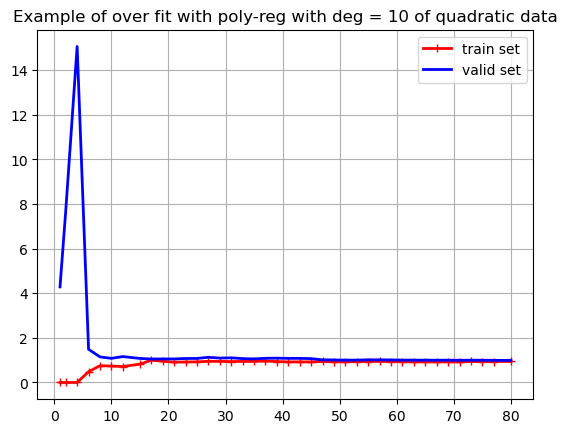

In [38]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 3, include_bias= False),
    LinearRegression()
)

X  = 6 * np.random.rand(m,1) -3 
y = 0.5 * X **2 + X*2 + np.random.randn(m,1)
train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, 
                                                         X, y,
                                                         train_sizes= np.linspace(0.01, 1.0, 40),
                                                         cv = 5,
                                                         scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = 'train set')
plt.plot(train_sizes, valid_errors, "b-", linewidth = 2, label = 'valid set')
plt.title("Example of over fit with poly-reg with deg = 10 of quadratic data")
plt.grid()
plt.legend()
plt.show()

# 4.5 Linear model with Regularization

- One of the way to reduce the overfitting is to regulate the model
- Common ways to regualte are
  1. Ridge
  2. Lasso
  3. Elastic Net
- For a linear problems with SGD optimizer, we can use **SGDRegressor** for easy implementation


### 4.5.1 Ridge

- Use l2 norm
- shrink weights to reduce overfitting, but not eliminate


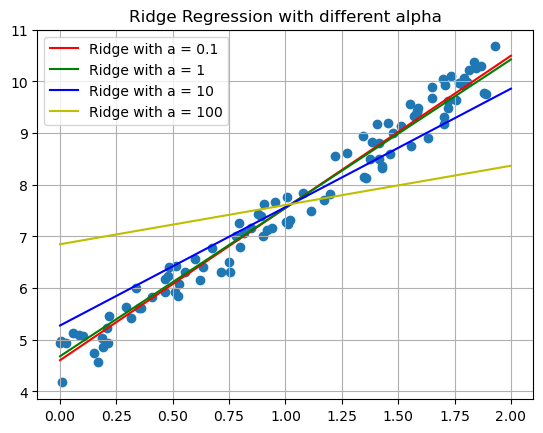

In [ ]:
m = 100
X = 2 * np.random.rand(m, 1) # Column Vector
y = 4+ 3 * X + np.random.rand(m, 1)  # Column Vector


from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", alpha= 0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=random_seed)
sgd_reg.fit(X, y.ravel()) # ravel for 1D tarrget

y_pred = sgd_reg.predict([[0],[2]])


sgd_reg_1 = SGDRegressor(penalty="l2", alpha= 1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=random_seed)
sgd_reg_1.fit(X, y.ravel()) # ravel for 1D tarrget

y_pred_1 = sgd_reg_1.predict([[0],[2]])



sgd_reg_10 = SGDRegressor(penalty="l2", alpha= 10 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=random_seed)
sgd_reg_10.fit(X, y.ravel()) # ravel for 1D tarrget

y_pred_10 = sgd_reg_10.predict([[0],[2]])



sgd_reg_100 = SGDRegressor(penalty="l2", alpha= 100 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=random_seed)
sgd_reg_100.fit(X, y.ravel()) # ravel for 1D tarrget

y_pred_100 = sgd_reg_100.predict([[0],[2]])



plt.scatter(X,y)
plt.plot([[0],[2]], y_pred, 'r-', label = 'Ridge with a = 0.1')
plt.plot([[0],[2]], y_pred_1, 'g-', label = 'Ridge with a = 1')
plt.plot([[0],[2]], y_pred_10, 'b-', label = 'Ridge with a = 10')
plt.plot([[0],[2]], y_pred_100, 'y-', label = 'Ridge with a = 100')
plt.grid()
plt.title('Ridge Regression with different alpha')
plt.legend()
plt.show()

### 4.5.2 Lasso

- use l1 norm
- shirnk until the weights become zero
- make models to be sparse


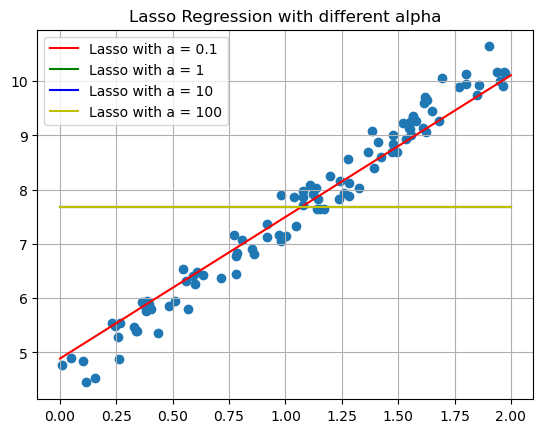

In [54]:
m = 100
X = 2 * np.random.rand(m, 1) # Column Vector
y = 4+ 3 * X + np.random.rand(m, 1)  # Column Vector


from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l1", alpha= 0.1, tol=None,
                       max_iter=1000, eta0=0.01, random_state=random_seed)
sgd_reg.fit(X, y.ravel()) # ravel for 1D tarrget

y_pred = sgd_reg.predict([[0],[2]])


sgd_reg_1 = SGDRegressor(penalty="l1", alpha= 1, tol=None,
                       max_iter=1000, eta0=0.01, random_state=random_seed)
sgd_reg_1.fit(X, y.ravel()) # ravel for 1D tarrget

y_pred_1 = sgd_reg_1.predict([[0],[2]])



sgd_reg_10 = SGDRegressor(penalty="l1", alpha= 10, tol=None,
                       max_iter=1000, eta0=0.01, random_state=random_seed)
sgd_reg_10.fit(X, y.ravel()) # ravel for 1D tarrget

y_pred_10 = sgd_reg_10.predict([[0],[2]])



sgd_reg_100 = SGDRegressor(penalty="l1", alpha= 100, tol=None,
                       max_iter=1000, eta0=0.01, random_state=random_seed)
sgd_reg_100.fit(X, y.ravel()) # ravel for 1D tarrget

y_pred_100 = sgd_reg_100.predict([[0],[2]])



plt.scatter(X,y)
plt.plot([[0],[2]], y_pred, 'r-', label = 'Lasso with a = 0.1')
plt.plot([[0],[2]], y_pred_1, 'g-', label = 'Lasso with a = 1')
plt.plot([[0],[2]], y_pred_10, 'b-', label = 'Lasso with a = 10')
plt.plot([[0],[2]], y_pred_100, 'y-', label = 'Lasso with a = 100')
plt.grid()
plt.title('Lasso Regression with different alpha')
plt.legend()
plt.show()

### 4.5.3 Elastic Net

- combination of Ridge and Lasso


In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha= 0.1, l1_ratio=0.5)
elastic_net.fit(X,y)

ElasticNet(alpha=0.1)

# 4.6 Logistic Regression

- the most simple linear binary classification model
- returns **logistic** of the result


### 4.6.1 Probability Prediction

**sigmoid** = $\sigma(t) = \frac{1}{1+exp(-t)}$

- sigmoid maps t to values between 0 and 1

**logistic** = $\hat{p}(t) = h_\theta(x)= \sigma{(\theta^Tx)}$

- t is called **logit** or **log-odds**


### 4.6.2 Train and Loss

- use log loss


### 4.6.3 Descision Boundary


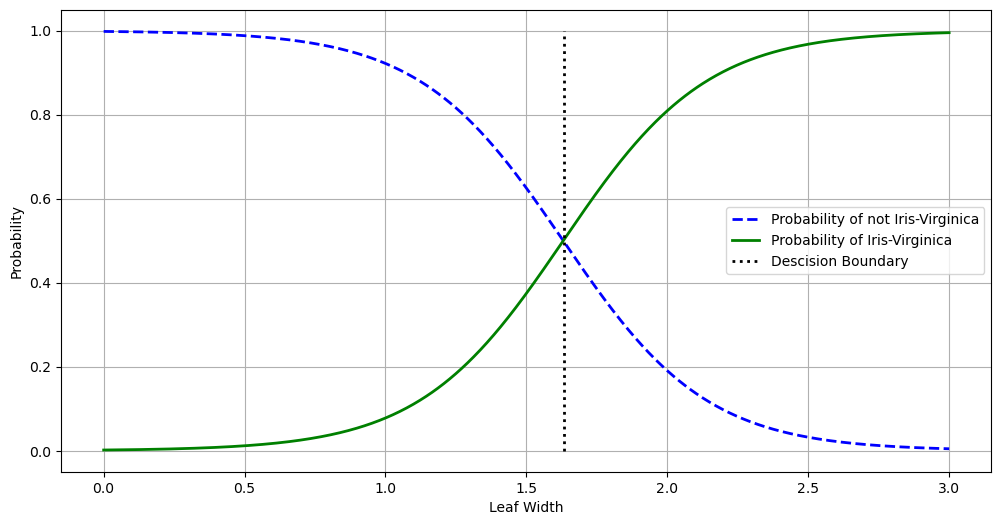

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed)

log_reg = LogisticRegression(random_state= random_seed)
log_reg.fit(X_train, y_train)


X_new = np.linspace(0, 3, 1000).reshape(-1,1) # change to the column vector
y_proba = log_reg.predict_proba(X_new)
descision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]

plt.figure(figsize=(12,6))
plt.plot(X_new, y_proba[:,0], 'b--', linewidth = 2, label = 'Probability of not Iris-Virginica')
plt.plot(X_new, y_proba[:,1], 'g-', linewidth = 2, label = 'Probability of Iris-Virginica')
plt.plot([descision_boundary, descision_boundary], [0,1], 'k:', linewidth = 2, label = 'Descision Boundary')
plt.legend()
plt.xlabel("Leaf Width")
plt.ylabel("Probability")
plt.grid()